In [39]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [63]:
# Read the data description file: Column names and their units
df = pd.read_csv('../data/data_description.csv', delimiter=';')
df

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Q,Reactive_power,kVAr,NaN
1,Ws,Wind_speed,m/s,Average wind speed
2,Va2,Vane_position_2,deg,Second wind vane on the nacelle
3,Git,Gearbox_inlet_temperature,deg_C,NaN
4,Ot,Outdoor_temperature,deg_C,NaN
5,Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
6,Nf,Grid_frequency,Hz,NaN
7,Nu,Grid_voltage,V,NaN
8,Dst,Generator_stator_temperature,deg_C,NaN
9,Wa_c,Absolute_wind_direction_corrected,deg,NaN


In [31]:
df = pd.read_csv('../data/R80711.csv', delimiter=',')
print(len(df))

261812


In [32]:
# convert the date_time column to datetime format
df['Date_time'] = pd.to_datetime(df['Date_time'])

def make_time_utc(row):
    return row['Date_time'].astimezone(datetime.timezone.utc)

df['Date_time_utc'] = df.apply(make_time_utc, axis=1)

In [33]:
df['month'] = pd.DatetimeIndex(df['Date_time_utc']).month
df['year'] = pd.DatetimeIndex(df['Date_time_utc']).year
df['time_of_day'] = pd.DatetimeIndex(df['Date_time_utc']).time

In [54]:
start = pd.Timestamp('2014-01-01 00:00:00-01:00')
end = pd.Timestamp('2014-06-01 00:00:00-01:00')
df_temp = df[(df['Date_time'] > start) & (df['Date_time'] < end)]
df_temp.reset_index(drop=True, inplace=True)
len(df_temp)


21724

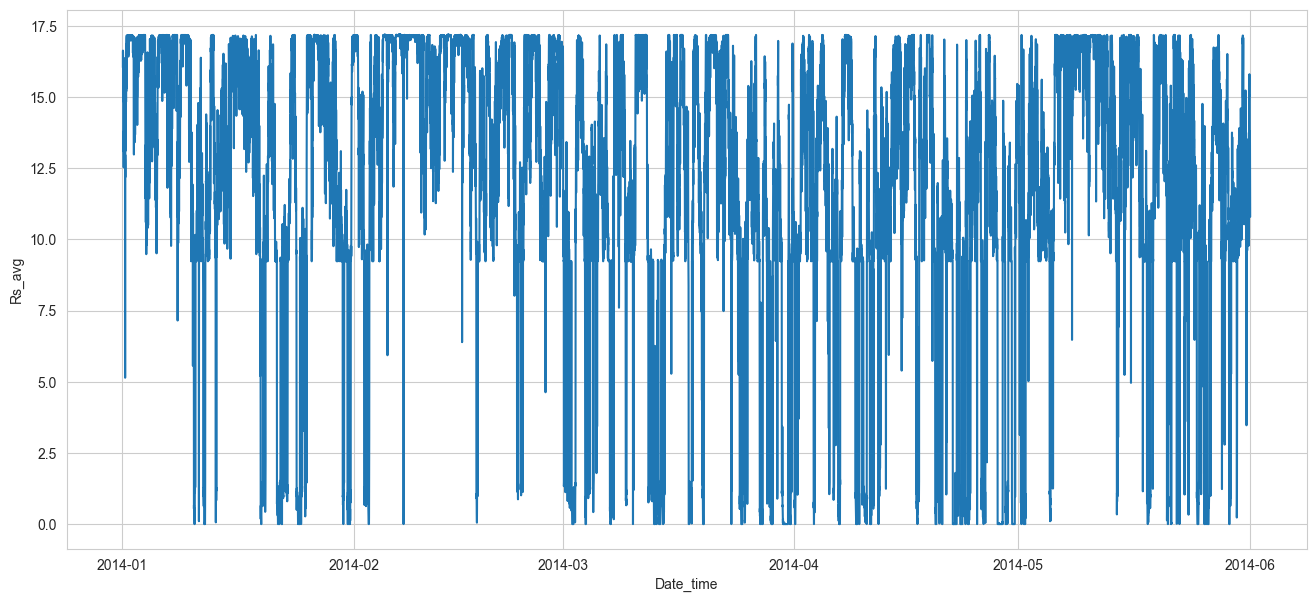

In [58]:
plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
sns.lineplot(x='Date_time', y='Rs_avg', data=df_temp)
plt.show()

In [47]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Date_time          4463 non-null   object             
 1   Date_time_nr       4463 non-null   int64              
 2   Wind_turbine_name  4463 non-null   object             
 3   Ba_avg             4463 non-null   float64            
 4   P_avg              4463 non-null   float64            
 5   Q_avg              4463 non-null   float64            
 6   Ya_avg             4463 non-null   float64            
 7   Yt_avg             4463 non-null   float64            
 8   Ws1_avg            4463 non-null   float64            
 9   Ws2_avg            4463 non-null   float64            
 10  Ws_avg             4463 non-null   float64            
 11  Wa_avg             4463 non-null   float64            
 12  Va_avg             4463 non-null   float64      

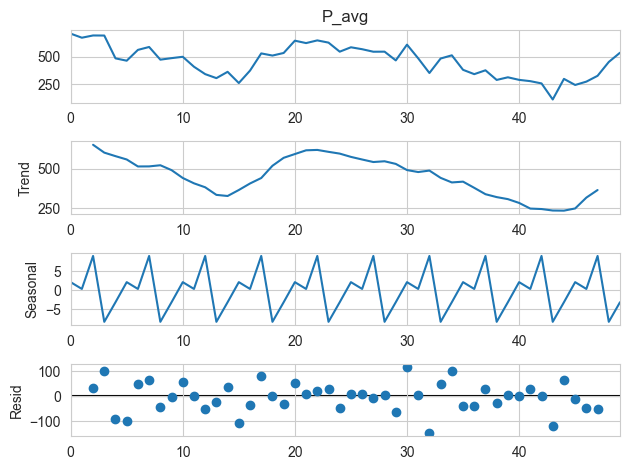

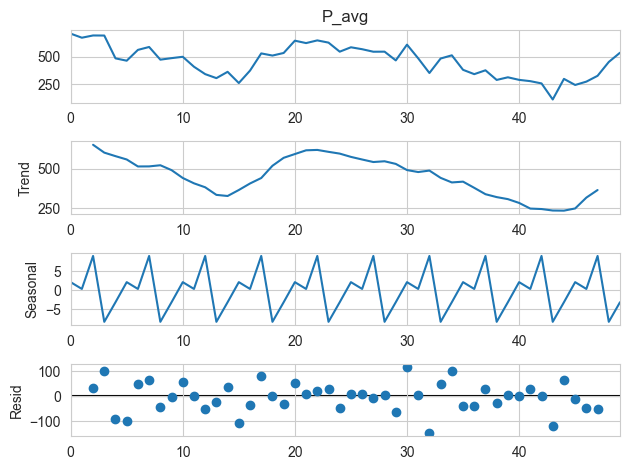

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_temp.iloc[:50]['P_avg'], model='additive', period=5)
result.plot()

In [91]:
df_temp.iloc[144:154]['Date_time']

144    2014-01-02 02:10:00+01:00
145    2014-01-02 02:20:00+01:00
146    2014-01-02 02:30:00+01:00
147    2014-01-02 02:40:00+01:00
148    2014-01-02 02:50:00+01:00
149    2014-01-02 03:00:00+01:00
150    2014-01-02 03:10:00+01:00
151    2014-01-02 03:20:00+01:00
152    2014-01-02 03:30:00+01:00
153    2014-01-02 03:40:00+01:00
Name: Date_time, dtype: object